<a href="https://colab.research.google.com/github/lavneet33/isentia/blob/main/Isentia_Topic_Modelling_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling of News Articles Using LDA and LSA and Training Supervised Classifier using LDA Vectors**

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator
import numpy as np
import os
import nltk
#from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint
import string
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from gensim.models.coherencemodel import CoherenceModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# **Connect with Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = "/content/drive/MyDrive/Isentia"

# check if your project folder exists. if not, it will be created.
os.chdir(root_dir)

os.chdir('/content/drive/MyDrive/Isentia')
print(os.path.abspath(os.curdir))


Mounted at /content/drive
/content/drive/MyDrive/Isentia


# **Open File with Training Dataset**

In [4]:

## Please upload train file into Google Drive
##with open('nps_comments.csv') as f2:
  ##  data = f2.read()
    ##data_list = data.split('\n')
    ##print(data_list)

##df = pd.DataFrame({'col':data_list})
df = pd.read_csv('nps_comments.csv')

In [5]:
df.head(2)

,Sno.,Customer Comments
0,1,Great sunnies as expected! However I ordered ...
1,2,Really good comms once the delivery was dispat...


# **Clean the Data,In this task we will be doing some preprocessing to convert our data in a form that we can feed our model with.**

In [7]:
##news_df = df[:10000]
tokenized_doc = df['Customer Comments'].str.replace("[^a-zA-Z#]", " ")
df.shape


def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text;

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc


0      great sunnies expected! however ordered option...
1      really good comms once delivery dispatched. qu...
2      online part easy good, very fast shipping whic...
3      very happy with purchase it's successful trans...
4      really good experience shipping efficient, lov...
                             ...                        
490    went into burnside store talked down working t...
491    amazing customer service. couldnt chanel sungl...
492                    quick fast cheap genuine \tyhanks
493    glasses were delivered wrong address. this aus...
494    sunglass offers great variety sunglasses. when...
Name: Customer Comments, Length: 495, dtype: object

# **Please Download the below packages**

In [8]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Handling the Stop-words**

In [9]:
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc


0      great sunnies expected however ordered option ...
1      really good comms delivery dispatched quick sh...
2      online part easy good fast shipping great happ...
3      happy purchase 's successful transaction .. lo...
4      really good experience shipping efficient love...
                             ...                        
490    went burnside store talked working purchased o...
491    amazing customer service couldnt chanel sungla...
492                    quick fast cheap genuine \tyhanks
493    glasses delivered wrong address australia post...
494    sunglass offers great variety sunglasses whene...
Name: Customer Comments, Length: 495, dtype: object

# **Initializing wordnet lemmatizer**

In [10]:
lemmatizer = WordNetLemmatizer()

def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

tokenized_doc = tokenized_doc.apply(lemData)
tokenized_doc

0      great sunnies expected however ordered option ...
1      really good comms delivery dispatched quick sh...
2      online part easy good fast shipping great happ...
3      happy purchase 's successful transaction .. lo...
4      really good experience shipping efficient love...
                             ...                        
490    went burnside store talked working purchased o...
491    amazing customer service couldnt chanel sungla...
492                    quick fast cheap genuine \tyhanks
493    glass delivered wrong address australia post f...
494    sunglass offer great variety sunglass whenever...
Name: Customer Comments, Length: 495, dtype: object

# **TF-IDF Vectorization**

In [11]:
# Initialising the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(stop_words="english", max_features= 1000, max_df = 0.5, smooth_idf=True)

#Vectorizing 'X' column
vector =tfidf.fit_transform(tokenized_doc)

#Converting vector into an array
X= vector.toarray()
pd.DataFrame(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33235837, 0.33235837, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# **Topic Modelling using TruncatedSVD**

In [12]:
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))
#svd_model.components_.shape


terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append(t[0])

final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)


The number of topics chosen are 5
['Topic 0: ', 'delivery', 'service', 'great', 'quick', 'fast', 'good', 'easy']
['Topic 1: ', 'service', 'excellent', 'great', 'customer', 'happy', 'product', 'sunglass']
['Topic 2: ', 'good', 'experience', 'service', 'price', 'range', 'virtual', 'overall']
['Topic 3: ', 'fast', 'delivery', 'super', 'shipping', 'quality', 'awesome', 'love']
['Topic 4: ', 'excellent', 'quick', 'service', 'delivery', 'fast', 'good', 'efficient']


# **Topic Modelling using LSI and LDA**

In [13]:
stop = stopwords_set
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

list_of_docs = tokenized_doc.tolist()
# Implementing the function
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:2])


[['great', 'sunnies', 'expected', 'however', 'ordered', 'option', 'said', 'order', 'receive', 'xmas', 'gift', 'time', 'annoying', 'gift', 'arrive', '28th', 'partner', 'without', 'gift', 'day', 'gutted', 'also', 'know', 'guy', 'dont', 'option', 'come', 'shipping', 'around', 'crazy', 'time', 'year', 'thanks', 'graeme'], ['really', 'good', 'comms', 'delivery', 'dispatched', 'quick', 'shopping', 'loved', 'able', 'virtually', 'absolutely', 'love', 'sunglass', '10010']]


# **Creating the dictionary id2word from our cleaned word list doc_clean**

In [14]:
dictionary = corpora.Dictionary(doc_clean)

# **Creating the corpus**

In [15]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# **Creating the LSI model**

In [16]:
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.485*"sunglass" + 0.313*"store" + 0.273*"delivery" + 0.248*"online" + '
  '0.220*"service" + 0.218*"order" + 0.180*"great" + 0.179*"glass" + '
  '0.175*"pair" + 0.161*"time"'),
 (1,
  '-0.603*"delivery" + 0.309*"store" + -0.294*"great" + 0.248*"sunglass" + '
  '-0.224*"quick" + -0.220*"service" + -0.201*"fast" + -0.172*"easy" + '
  '-0.165*"good" + -0.150*"price"'),
 (2,
  '0.508*"order" + -0.420*"sunglass" + 0.285*"delivery" + -0.206*"great" + '
  '0.191*"address" + -0.189*"service" + 0.171*"store" + 0.169*"january" + '
  '0.147*"click" + -0.142*"product"'),
 (3,
  '0.512*"sunglass" + -0.447*"glass" + -0.325*"pair" + -0.237*"online" + '
  '-0.190*"service" + 0.184*"delivery" + 0.103*"love" + 0.102*"store" + '
  '-0.101*"happy" + -0.093*"back"'),
 (4,
  '-0.518*"service" + -0.338*"great" + 0.276*"delivery" + -0.238*"store" + '
  '0.218*"glass" + 0.210*"sunglass" + -0.209*"product" + -0.176*"customer" + '
  '0.175*"pair" + 0.147*"would"')]


# **Creating the LDA Model**

In [17]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=5,id2word=dictionary, random_state=20, passes=30)

# printing the topics
ldamodel.print_topics(20,num_words=15)[:10]

[(0,
  '0.066*"delivery" + 0.051*"great" + 0.048*"service" + 0.034*"good" + 0.033*"quick" + 0.031*"fast" + 0.029*"easy" + 0.020*"price" + 0.020*"sunglass" + 0.019*"happy" + 0.017*"product" + 0.015*"online" + 0.014*"experience" + 0.014*"glass" + 0.013*"excellent"'),
 (1,
  '0.023*"sunglass" + 0.018*"would" + 0.014*"email" + 0.013*"delivery" + 0.013*"never" + 0.009*"experience" + 0.009*"return" + 0.009*"nt" + 0.009*"went" + 0.008*"order" + 0.006*"please" + 0.006*"still" + 0.006*"staff" + 0.006*"store" + 0.006*"pair"'),
 (2,
  '0.021*"order" + 0.020*"glass" + 0.019*"online" + 0.015*"store" + 0.013*"ordered" + 0.012*"time" + 0.011*"sunglass" + 0.011*"received" + 0.008*"day" + 0.007*"arrived" + 0.007*"quickly" + 0.007*"wanted" + 0.007*"parcel" + 0.007*"pair" + 0.006*"could"'),
 (3,
  '0.020*"glass" + 0.014*"sunglass" + 0.011*"delivery" + 0.010*"pair" + 0.010*"purchase" + 0.009*"item" + 0.009*"nt" + 0.009*"fantastic" + 0.009*"described" + 0.009*"nice" + 0.009*"online" + 0.008*"love" + 0.008*

# **Evaluation Metrics of LDA Model**

# **Compute Perplexity**

In [18]:
perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)


Perplexity:  -6.600809882786752


# **Compute Coherence Score**

In [19]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.38757662562247164


# **Word Cloud Visualisation**

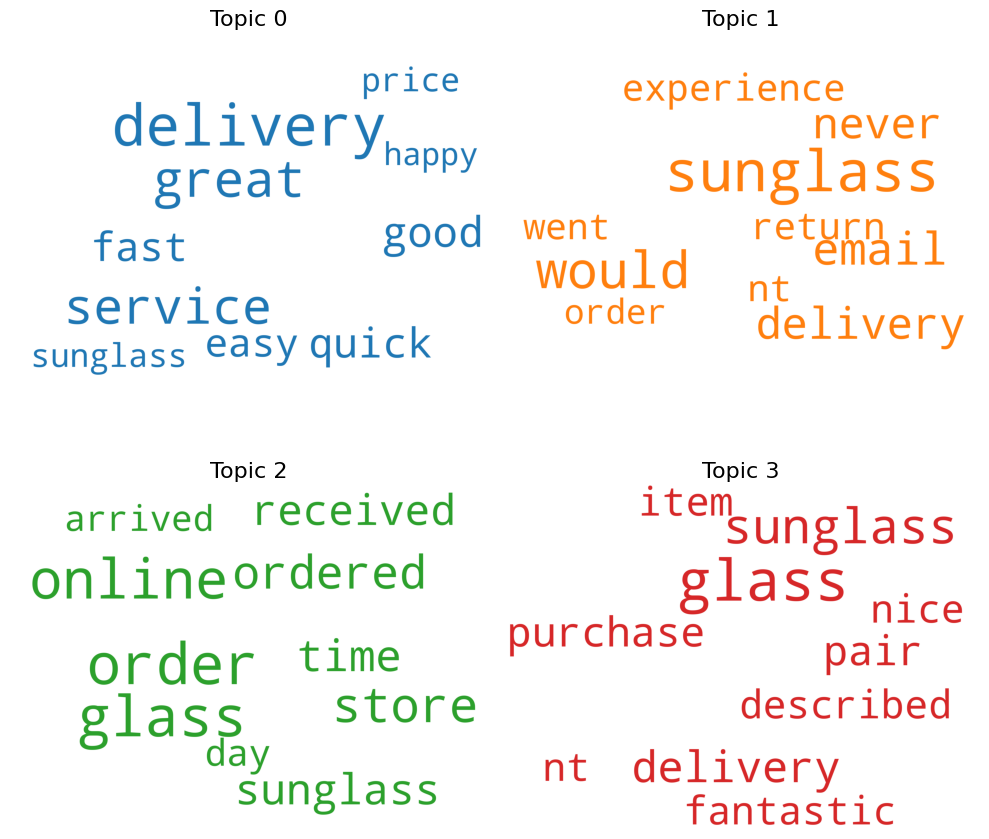

In [20]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()


# **Using LDA Feature Vectors Embedding as Input for Supervised Classifier**

In [ ]:
train_vectors = []
for i in range(len(news_df)):
    top_topics = ldamodel.get_document_topics(doc_term_matrix[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(5)]
    #topic_vec.extend([news_df.iloc[i].real_counts])
    #topic_vec.extend([len(news_df.iloc[i].text)])
    train_vectors.append(topic_vec)
train_vectors[2]

# **Convert Data into Array for K-Fold Validation**

In [ ]:
X = np.array(train_vectors)

###### We need to find y in training dataset as labels which I am unable to split


#news_df[['col', 'labels']] = news_df['col'].str.split(r"^([a-z]+)(_[a-z]+)+$", expand=True)
#news_df['labels'] = news_df['labels'].str[:-1]
#y = np.array(news_df.labels)

# **K_Fold Validation with Supervised Learning**

In [ ]:
kf = KFold(5, shuffle=True, random_state=42)
cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1,  = [], [], []

for train_ind, val_ind in kf.split(X, y):
    # Assign CV IDX
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]

    # Scale Data
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)

    # Logisitic Regression
    lr = LogisticRegression(
        class_weight= 'balanced',
        solver='newton-cg',
        fit_intercept=True
    ).fit(X_train_scale, y_train)

    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
